In [1]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
data = pd.read_csv("./Data/water_potability.csv")
data.dropna(axis=0, inplace = True)
# what else do we need?

In [2]:
target = data["Potability"]
features = data.drop(columns = ["Potability"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [3]:
print(target.shape[0])
print(features.shape[0])

2011
2011


In [4]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
parameters = {
    "n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}

my_KNN_model = GridSearchCV(KNN(), param_grid = parameters)
my_KNN_model.fit(x_train, y_train)
my_KNN_model.best_params_

{'n_neighbors': 10}

0.40556660039761433
0.5944333996023857
0.27142857142857146


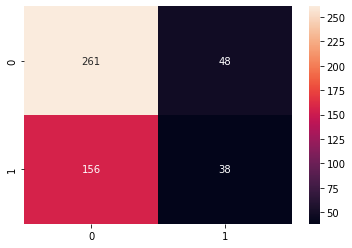

In [5]:
KNN_model_2 = KNN(n_neighbors = 12)
KNN_model_2.fit(x_train, y_train)
from sklearn.metrics import f1_score


y_hat = KNN_model_2.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)
print(mean_squared_error)
print(KNN_model_2.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test, y_hat), annot = True, fmt ='g')
score = f1_score(y_test, y_hat, average='binary')
print(score)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_param = {
    "n_estimators": [100,120,140,160,180,200],
    "max_features": ["log2", "sqrt", None],
    "min_samples_split": [10,20,30,40]
}

rfc_test = GridSearchCV(RandomForestClassifier(), param_grid = rfc_param).fit(x_train,y_train)
rfc_test.best_params_

{'max_features': None, 'min_samples_split': 20, 'n_estimators': 140}

0.30417495029821073
0.6958250497017893
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       309
           1       0.64      0.47      0.55       194

    accuracy                           0.70       503
   macro avg       0.68      0.65      0.66       503
weighted avg       0.69      0.70      0.68       503



<AxesSubplot:>

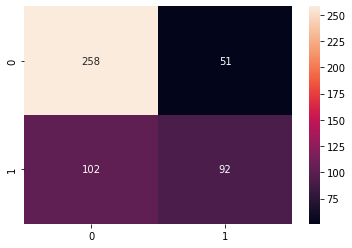

In [35]:
rfc_model = RandomForestClassifier(max_features = None, min_samples_split = 20, n_estimators = 140).fit(x_train,y_train)
y_hat_rfc = rfc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_rfc)**2))/len(y_test)
print(mean_squared_error)
print(rfc_model.score(x_test,y_test))
print(classification_report(y_test, y_hat_rfc))
sns.heatmap(confusion_matrix(y_test, y_hat_rfc), annot = True, fmt ='g')

In [18]:
from sklearn.tree import DecisionTreeClassifier

dtc_param = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [20,30,40,50,60,70]
}

dtc_test = GridSearchCV(DecisionTreeClassifier(), param_grid = dtc_param).fit(x_train,y_train)
dtc_test.best_params_

{'max_depth': 3, 'max_leaf_nodes': 70}

0.34393638170974156
0.6560636182902585
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       309
           1       0.60      0.32      0.42       194

    accuracy                           0.66       503
   macro avg       0.64      0.59      0.59       503
weighted avg       0.64      0.66      0.63       503



<AxesSubplot:>

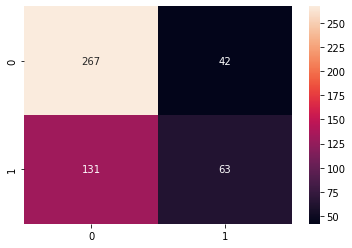

In [23]:
from sklearn.metrics import classification_report

dtc_model = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 70).fit(x_train,y_train)
y_hat_dtc = dtc_model.predict(x_test)
mean_squared_error = (np.sum((y_test - y_hat_dtc)**2))/len(y_test)
print(mean_squared_error)
print(dtc_model.score(x_test,y_test))
print(classification_report(y_test, y_hat_dtc))
sns.heatmap(confusion_matrix(y_test, y_hat_dtc), annot = True, fmt ='g')

In [28]:
# classification_report(y_test, y_hat_dtc, output_dict = True)
print(data[data["Potability"] == 0].shape[0])
print(data[data["Potability"] == 1].shape[0])

1200
811


In [16]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [17]:

data = pd.read_csv("./Data/water_potability.csv")

data.dropna(axis=0, inplace = True)

In [20]:
D = data.values
x = D[:,0:4]
y = D[:, 4]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20)

In [21]:

model = SVC()
model.fit(X_train, Y_train)
#mean_squared_error = (np.sum((y_test - y_hat)**2))/len(y_test)

ValueError: Unknown label type: 'continuous'

In [0]:
Y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("Mean-Squared-Error:", mean_squared_error)